# **Session #2 Homework**

### **Loading Required Libraries**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **Getting the data**

- using the New York City Airbnb open Data

In [96]:
df=pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [97]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [98]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

# **Exploratory data analysis**

In [99]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['clean_&_quiet_apt_home_by_the_park' 'skylit_midtown_castle'
 'the_village_of_harlem....new_york_!' 'cozy_entire_floor_of_brownstone'
 'entire_apt:_spacious_studio/loft_by_central_park']
47486

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['john' 'jennifer' 'elisabeth' 'lisaroxanne' 'laura']
11428

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

neighbourhood
['kensington' 'midtown' 'harlem' 'clinton_hill' 'east_harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['private_room' 'entire_home/apt' 'shared_room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

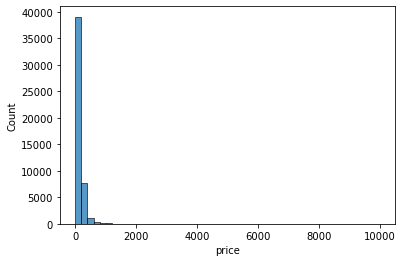

In [100]:
sns.histplot(df.price, bins=50)

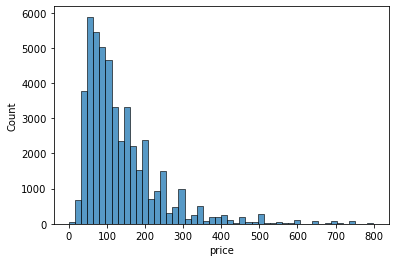

In [101]:
sns.histplot(df.price[df.price < 800], bins=50)

#### For the rest of the homework, you'll need to use only these columns:

- latitude,
- longitude,
- price,
- minimum_nights,
- number_of_reviews,
- reviews_per_month,
- calculated_host_listings_count,
- availability_365.

In [102]:
features =  ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

### **Question 1**

- Find a feature with missing values. How many missing values does it have?

In [103]:
df[features].isnull().sum()

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### **Question 2**

- What's the median (50% percentile) for variable 'minimum_nights'?

In [104]:
df["minimum_nights"].median(axis = 0)

3.0

### **Setting up the Validation Framework**

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value (price) is not in your dataframe.
- Apply the log transformation to the price variable using the np.log1p() function.

In [105]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [106]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [107]:
train = df.iloc[idx[:n_train]]
val = df.iloc[idx[n_train:n_train+n_val]]
test = df.iloc[idx[n_train+n_val:]]

In [108]:
x_train = train.loc[:,features]
x_val = val.loc[:,features]
x_test = test.loc[:,features]

In [109]:
y_train = np.log1p(train.price.values)
y_val = np.log1p(val.price.values)
y_test = np.log1p(test.price.values)

### **Question 3**

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [110]:
def regutrain_Linear(df, y, r):
    ones = np.ones(df.shape[0])
    X = np.column_stack([ones, df])
    
    XTX = X.T.dot(X) + r * np.eye(X.shape[1])
    
    XTXInv = np.linalg.inv(XTX)
    w_0 = XTXInv.dot(X.T).dot(y)
    
    return w_0

In [111]:
def prepare(df):
    temp = df.copy()
    temp.loc[:,'reviews_per_month'] = temp['reviews_per_month'].fillna(0)
    return temp

In [112]:
def trainLinear(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTXInv = np.linalg.inv(XTX)
    w_0 = XTXInv.dot(X.T).dot(y)
    return w_0

In [113]:
def Linear_score(w, toScore):
    score = w[0] + toScore.dot(w[1:])
    return score

In [114]:
def impute_Mean(X):
    temp = X.copy()
    mean = temp.reviews_per_month.mean()
    temp.loc[:,'reviews_per_month'] = temp['reviews_per_month'].fillna(mean)
    return mean, temp

In [115]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [116]:
# zero padding 


x_train_zeropad = prepare(x_train)
val_zeropad = prepare(x_val)
weights = trainLinear(x_train_zeropad, y_train)
val_score = Linear_score(weights, val_zeropad)
print("RMSE with zero padding : " + rmse(val_score, y_val).round(2).astype(str))

RMSE with zero padding : 0.64


In [117]:
# imputation with mean 

z, train_impute = impute_Mean(x_train)
weights = trainLinear(train_impute, y_train)
x_valimpute = x_val.copy()
x_valimpute.loc[:,'reviews_per_month'] = x_valimpute['reviews_per_month'].fillna(z)
val_score_mean = Linear_score(weights, x_valimpute)
print("RMSE with mean: " + rmse(val_score_mean, y_val).round(2).astype(str))

RMSE with mean: 0.64


### **Question 4**

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [118]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [119]:
for i in r:
    x_train_zero = prepare(x_train)
    weights_1 = regutrain_Linear(x_train_zero, y_train,i)
    x_val_zero = prepare(x_val)
    score_reguzero = Linear_score(weights_1, x_val_zero)
    h = rmse(score_reguzero, y_val).round(2)
    print(f"regularization = {i:6},RMSE= {h:.2f}")

regularization =      0,RMSE= 0.64
regularization =  1e-06,RMSE= 0.64
regularization = 0.0001,RMSE= 0.64
regularization =  0.001,RMSE= 0.64
regularization =   0.01,RMSE= 0.66
regularization =    0.1,RMSE= 0.68
regularization =      1,RMSE= 0.68
regularization =      5,RMSE= 0.68
regularization =     10,RMSE= 0.68


### **Question 5**

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [120]:
seed = [0,1,2,3,4,5,6,7,8,9]
Lst = []

In [121]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [122]:
for j in seed:
    idx = np.arange(n)
    np.random.seed(j)
    np.random.shuffle(idx)

In [123]:
train = df.iloc[idx[:n_train]]
val = df.iloc[idx[n_train:n_train+n_val]]
test = df.iloc[idx[n_train+n_val:]]

In [124]:
x_train = train.loc[:,features]
x_val = val.loc[:,features]
x_test = test.loc[:,features]

In [125]:
y_train = np.log1p(train.price.values)
y_val = np.log1p(val.price.values)
y_test = np.log1p(test.price.values)

In [126]:
x_train_zero = prepare(x_train)
x_val_zero = prepare(x_val)
weights_2 = regutrain_Linear(x_train_zero, y_train,r= 0.0)
score = Linear_score(weights_2, x_val_zero)
f = rmse(score, y_val).round(2)
Lst.append(f)

print(f)
print('Sd of RMSE: ' + np.std(Lst).round(3).astype(str))

0.64
Sd of RMSE: 0.0


### **Question 6**
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Train a model with r=0.001.
- What's the RMSE on the test dataset?

In [127]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

train_val = df.iloc[idx[:n_train+n_val]]
test = df.iloc[idx[n_train+n_val:]]


In [128]:
x_trainval = train_val.loc[:,features]
x_test = test.loc[:,features]

y_trainval = np.log1p(train_val.price.values)
y_test = np.log1p(test.price.values)

In [129]:
x_new = prepare(x_trainval)
weights_3 = regutrain_Linear(x_new, y_trainval,0.001)
x_test_0 = prepare(x_test)
score_3 = Linear_score(weights_3, x_test_0)
g = rmse(score_3, y_test).round(3)
print(g)

0.645


#                                                 **DONE**